<a href="https://colab.research.google.com/github/hrd1409/python-ml-projects/blob/master/InsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np


Import Dataset

In [2]:
data=pd.read_csv("/content/insurance.csv")

In [4]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
907,44,female,32.340,1,no,southeast,7633.72060
699,23,female,39.270,2,no,southeast,3500.61230
211,40,male,30.875,4,no,northwest,8162.71625
875,23,female,28.120,0,no,northwest,2690.11380
89,55,female,26.980,0,no,northwest,11082.57720


Data information

In [6]:
data.shape

(1338, 7)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
data['sex']=data['sex'].map({'female':0,"male":1})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,1,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,3,21984.47061
4,32,1,28.880,0,no,3,3866.85520


In [16]:
data['smoker']=data['smoker'].map({'yes':1,"no":0})

Data split

In [18]:
X=data.drop(columns="charges")
Y=data['charges']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Model selection

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
svm=SVR()
svm.fit(X_train,Y_train)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [25]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [28]:
df1=pd.DataFrame({"actual":Y_test,"lr":y_pred1,"svm":y_pred2,"rf":y_pred3,"gr":y_pred4})

In [29]:
df1

,actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10187.868295,11001.128629
887,5272.17580,7116.295018,9492.515425,5694.204622,5840.174656
890,29330.98315,36909.013521,9648.758701,28298.513063,28001.980112
1293,9301.89355,9507.874691,9555.044136,10446.156091,9745.291602
259,33750.29180,27013.350008,9420.421978,34492.928975,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46823.511516,45431.423211
575,12222.89830,11814.555568,9625.431547,12502.292886,12465.025294
535,6067.12675,7638.107736,9504.168517,6425.657395,6974.336525
543,63770.42801,40959.081722,9605.004594,46591.833598,47862.047791


Visualization of model

In [30]:
from matplotlib import pyplot as plt

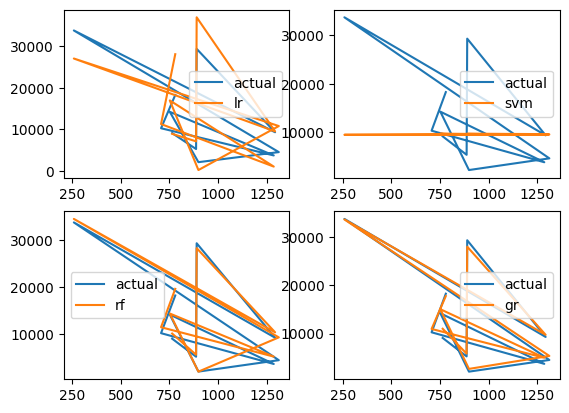

In [35]:
#here 221 because 2*2 plot and 1 subplot
plt.subplot(221)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()
#here 221 because 2*2 plot and 2 subplot
plt.subplot(222)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()
#here 221 because 2*2 plot and 3 subplot
plt.subplot(223)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()
#here 221 because 2*2 plot and 4 subplot
plt.subplot(224)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()


Evaluation of model

In [37]:
from sklearn import metrics

In [41]:
score1=metrics.r2_score(Y_test,y_pred1)
score2=metrics.r2_score(Y_test,y_pred2)
score3=metrics.r2_score(Y_test,y_pred3)
score4=metrics.r2_score(Y_test,y_pred4)

In [43]:
print( score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.8613384509764591 0.8779726251291786


Prediction

In [49]:
data1={'age':40,'sex':1,'bmi':40.30,'children':3,'smoker':1,'region':2}
dataframe=pd.DataFrame(data1,index=[0])

In [50]:
print(dataframe)

   age  sex   bmi  children  smoker  region
0   40    1  40.3         3       1       2


In [52]:
new_pred=gr.predict(dataframe)
print(new_pred)

[43178.37983995]
